This is for research question 4.

Is there a correlation between a movie’s ending and its success (ratings, box office revenue, etc.)?

We will explore whether happy or tragic endings have any impact on a movie's popularity or financial performance.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# path
DATA_FOLDER = '../data/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_final.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')


In [2]:
movies.head()

,Movie_ID,Other_Column,Title,Movie release date,Movie runtime,Movie languages,Movie countries,Movie genres,Summary,Score,director,vote_average,revenue,collection,Budget,Production
0,975900,/m/03vyhn,Ghosts of Mars,2001,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...","cre on him, he handcuffs Ballard to her cot an...",0.000000,John Carpenter,5.112,14010832.0,NaN,28000000.0,"[{'id': 51312, 'logo_path': None, 'name': 'Ani..."
1,9363483,/m/0285_cd,White Of The Eye,1987,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",sive vest. Mike opens fire on him with a machi...,-0.120000,Donald Cammell,5.800,0.0,NaN,0.0,"[{'id': 26932, 'logo_path': None, 'name': ""Mrs..."
2,261236,/m/01mrr1,A Woman in Flames,1983,106.0,German,Germany,Drama,"k out on him, and he gets angry, throws her ag...",0.060000,Robert van Ackeren,5.400,0.0,NaN,0.0,"[{'id': 1766, 'logo_path': None, 'name': 'Diet..."
3,6631279,/m/0gffwj,Little city,1997,93.0,English,United States of America,"Romantic comedy, Ensemble, Comedy-drama, Drama...",a soon tires of Anne and breaks off their affa...,0.144444,Hervé Palud,5.978,0.0,NaN,0.0,"[{'id': 311, 'logo_path': '/TNGvZ8zOklntjPP3Ec..."
4,77856,/m/0kcn7,Mary Poppins,1964,139.0,English,United States of America,"Children's/Family, Musical, Fantasy, Comedy, D...","window. In the park with other kite-flyers, Mr...",0.331250,Robert Stevenson,7.600,103100000.0,527439.0,4650000.0,"[{'id': 3166, 'logo_path': '/vyyv4Gy9nPqAZKElP..."


In [3]:
# drop movies without vote average or revenue
movies_filtered = movies.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

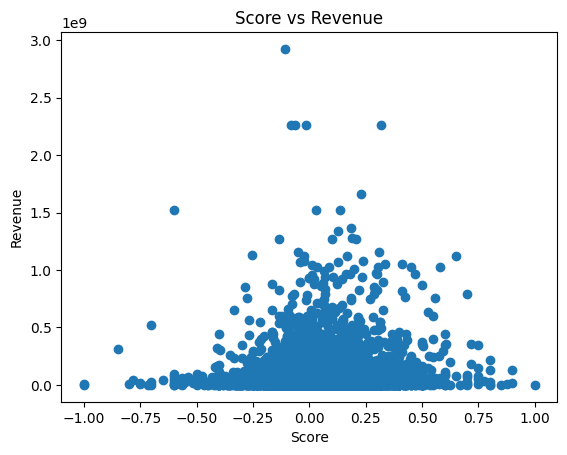

In [4]:
# plot score vs revenue
plt.scatter(movies_filtered['Score'], movies_filtered['revenue'])
plt.xlabel('Score')
plt.ylabel('Revenue')
plt.title('Score vs Revenue')
plt.show()

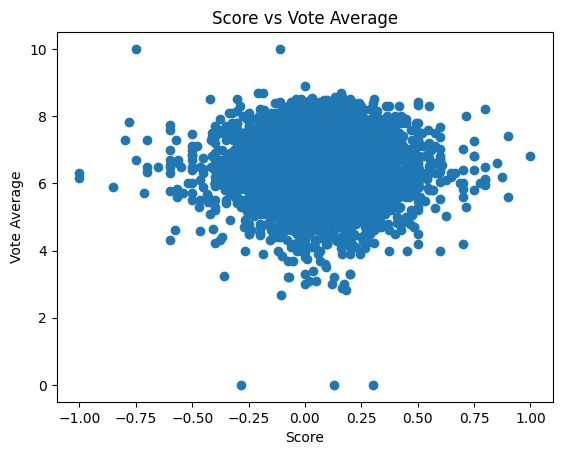

In [5]:
# plot score vs vote average
plt.scatter(movies_filtered['Score'], movies_filtered['vote_average'])
plt.xlabel('Score')
plt.ylabel('Vote Average')
plt.title('Score vs Vote Average')
plt.show()


In [6]:
# use t test to test if the average revenue is different for movies with score 1 and movies with score 5
from scipy.stats import ttest_ind

movies_score_low_revenue = movies_filtered[movies_filtered['Score'] < -0.25]['revenue'].astype(float)
movies_score_high_revenue = movies_filtered[movies_filtered['Score'] > 0.25]['revenue'].astype(float)

t_stat, p_value = ttest_ind(movies_score_low_revenue, movies_score_high_revenue)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('The difference is statistically significant')
else:
    print('The difference is not statistically significant')


t-statistic: -1.4923897739237577
p-value: 0.13587987389734735
The difference is not statistically significant


In [8]:
movies_score_low_vote_average = movies_filtered[movies_filtered['Score'] < -0.25]['vote_average'].astype(float)
movies_score_high_vote_average = movies_filtered[movies_filtered['Score'] > 0.25]['vote_average'].astype(float)

t_stat, p_value = ttest_ind(movies_score_low_vote_average, movies_score_high_vote_average)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('The difference is statistically significant')
else:
    print('The difference is not statistically significant')


t-statistic: 0.12254474638500776
p-value: 0.9024896937738693
The difference is not statistically significant
